# Recommended Analysis

**Historical stock market data for current Nifty 50 companies, from 2000-2021. Each record represents a single day of trading and includes the ticker name, volume, and high, low, open, and close prices.**

1. Ranking overall, by Industry and by single title (top 5), using mean Volume (and Trades)
2. Ranking of Must trading stock Since Inception (using Trades)
3. Top 5 best stocks using delta price % Since Inception
4. Top 5 worst stocks using delta price % Since Inception
5. Standard deviation is a statistical term that measures the amount of variability or dispersion around an average. Standard deviation is also a measure of volatility: using Numpy is easy to calculate it for each stock or sector into Index.

**Import Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Download Dataset**

In [2]:
# download all the quantity values as one dataframe
quants = pd.read_csv('/kaggle/input/nifty50-stock-market-data/NIFTY50_all.csv')
quants.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [3]:
# download the metadata file containing qualitative data as another dataframe
qual = pd.read_csv('/kaggle/input/nifty50-stock-market-data/stock_metadata.csv')
qual.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finserv Ltd.,FINANCIAL SERVICES,BAJAJFINSV,EQ,INE918I01018


**Data Processing**

In [4]:
# now let's join the both dataframes on the symbol and series columns
nifty = pd.merge(quants, qual, on = ['Symbol', 'Series'], how = 'inner')
nifty.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company Name,Industry,ISIN Code
0,2012-01-17,ADANIPORTS,EQ,135.5,137.1,141.00,135.00,140.1,140.00,138.13,1636196,2.260074e+13,18374.0,1004327.0,0.6138,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
1,2012-01-18,ADANIPORTS,EQ,140.0,142.0,143.80,138.70,143.0,141.70,141.25,890591,1.257986e+13,15615.0,404925.0,0.4547,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
2,2012-01-19,ADANIPORTS,EQ,141.7,144.0,150.55,143.15,149.5,149.40,146.72,1456077,2.136382e+13,31299.0,721545.0,0.4955,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
3,2012-01-20,ADANIPORTS,EQ,149.4,151.9,157.60,150.25,155.4,155.40,153.76,1634070,2.512583e+13,23335.0,861145.0,0.5270,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042
4,2012-01-23,ADANIPORTS,EQ,155.4,155.4,155.40,145.10,146.4,146.75,149.54,1657609,2.478768e+13,12400.0,820653.0,0.4951,Adani Ports and Special Economic Zone Ltd.,SERVICES,INE742F01042


In [5]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207850 entries, 0 to 207849
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                207850 non-null  object 
 1   Symbol              207850 non-null  object 
 2   Series              207850 non-null  object 
 3   Prev Close          207850 non-null  float64
 4   Open                207850 non-null  float64
 5   High                207850 non-null  float64
 6   Low                 207850 non-null  float64
 7   Last                207850 non-null  float64
 8   Close               207850 non-null  float64
 9   VWAP                207850 non-null  float64
 10  Volume              207850 non-null  int64  
 11  Turnover            207850 non-null  float64
 12  Trades              118547 non-null  float64
 13  Deliverable Volume  197043 non-null  float64
 14  %Deliverble         197043 non-null  float64
 15  Company Name        207850 non-nul

In [6]:
nifty.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Company Name', 'Industry', 'ISIN Code'],
      dtype='object')

In [7]:
nifty.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,207850.000000,207850.000000,207850.000000,207850.000000,207850.000000,207850.000000,207850.000000,2.078500e+05,2.078500e+05,1.185470e+05,1.970430e+05,197043.000000
mean,1340.460244,1342.134724,1361.592898,1321.200659,1340.740087,1340.923183,1341.483924,3.255233e+06,1.736416e+14,6.243886e+04,1.398598e+06,0.502153
std,2702.270279,2706.425324,2741.923161,2666.559815,2702.448168,2703.245137,2703.762675,7.722111e+06,3.462227e+14,6.899840e+04,2.959925e+06,0.187072
min,2.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.210000,2.500000e+01,6.300000e+07,1.100000e+01,5.000000e+00,0.023600
25%,306.450000,306.800000,311.950000,301.412500,306.550000,306.550000,306.800000,2.480170e+05,2.106337e+13,2.210500e+04,1.374100e+05,0.366300
50%,616.100000,617.000000,627.800000,605.200000,616.000000,616.250000,616.755000,1.100108e+06,7.835530e+13,4.453200e+04,5.393670e+05,0.511000
75%,1291.487500,1293.000000,1312.350000,1272.000000,1291.000000,1291.700000,1292.385000,3.236001e+06,1.997729e+14,7.952000e+04,1.567378e+06,0.636600
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000


In [8]:
# check null values

nifty.isnull().sum()

Date                      0
Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                89303
Deliverable Volume    10807
%Deliverble           10807
Company Name              0
Industry                  0
ISIN Code                 0
dtype: int64

There are a lot of null values, let's clean the null values in data

In [9]:
# if the variable has data of type int, float or complex numbers then we will fill the null values with the mean of that column
nifty.fillna(value = 0.0, inplace = True)
nifty.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Company Name          0
Industry              0
ISIN Code             0
dtype: int64

Now the data is free of null values.

In [10]:
# convert date column to date datatype
nifty['Date'] = pd.to_datetime(nifty['Date'])
print(nifty['Date'].dtype)

datetime64[ns]


# Data Analysis

**1. Ranking overall, by Industry and by single title (top 5), using mean Volume (and Trades)**

In [11]:
# overall ranking by grouping the symbol and calculating the average of volume and traders
overall_ranking = nifty.groupby('Company Name').agg({'Volume':'mean', 'Trades':'mean'}).sort_values(by = 'Trades', ascending = False)
top_company_volume = overall_ranking['Volume'].idxmax()
top_company_trade = overall_ranking['Trades'].idxmax()
print(f'The top company by volume is {top_company_volume} and the top company by trade is {top_company_trade}')

The top company by volume is Vedanta Ltd. and the top company by trade is Infosys Ltd.


In [12]:
company_ranks_trades = nifty.groupby('Company Name').agg({'Volume':'mean', 'Trades':'mean'}).rank(ascending = False)
company_ranks_trades = company_ranks_trades.sort_values(by = 'Trades')
company_ranks_trades.head()

,Volume,Trades
Company Name,,
Infosys Ltd.,16.0,1.0
Axis Bank Ltd.,9.0,2.0
Vedanta Ltd.,1.0,3.0
Tata Motors Ltd.,2.0,4.0
State Bank of India,3.0,5.0


 The top 5 companies by overall ranking are 
          Company Name        Volume         Trades
0         Infosys Ltd.  4.498399e+06  112367.318144
1       Axis Bank Ltd.  6.916522e+06   87271.385091
2         Vedanta Ltd.  1.564060e+07   79301.257085
3     Tata Motors Ltd.  1.247240e+07   73240.906199
4  State Bank of India  1.003930e+07   69756.124576


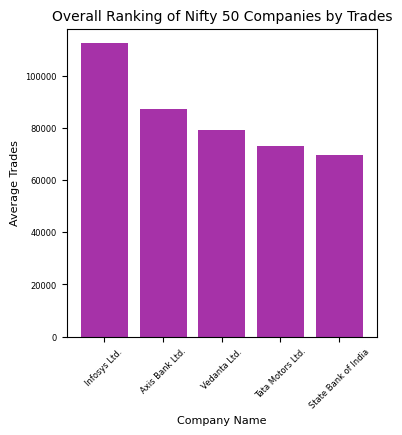

In [13]:
# top 5 companies by overall ranking
top_5_companies_trades = overall_ranking.head(5).reset_index()
print(f' The top 5 companies by overall ranking are \n{top_5_companies_trades}')

# plot a graph for the top 5 companies
plt.figure(figsize = (4,4))
plt.bar(x = top_5_companies_trades['Company Name'], height = top_5_companies_trades['Trades'], color = '#a632a8')
plt.xlabel('Company Name', fontsize = 8)
plt.ylabel('Average Trades', fontsize = 8)
plt.xticks(fontsize = 6, rotation = 45)
plt.yticks(fontsize = 6)
plt.title('Overall Ranking of Nifty 50 Companies by Trades', fontsize = 10)
plt.show()

**Data Interpretation:**
Infosys, Axis Bank and Vedanta companies have the best overall ranking. 

In [14]:
# top 5 industries by mean volume and trades

top_industry = nifty.groupby('Industry').agg({'Volume':'mean', 'Trades':'mean'})

# top 5 industries by mean volume
top_industry_volume = top_industry['Volume'].sort_values(ascending = False).head().to_frame().reset_index()
print(f'The top 5 industries by Average Volume are: \n{top_industry_volume}')

# top 5 industries by mean trades
top_industry_trades = top_industry['Trades'].sort_values(ascending = False).head().to_frame().reset_index()
print(f'The top 5 industries by Average Trades are: \n{top_industry_trades}')

The top 5 industries by Average Volume are: 
                Industry        Volume
0                 METALS  7.027916e+06
1                TELECOM  6.424966e+06
2  MEDIA & ENTERTAINMENT  4.902652e+06
3                 ENERGY  4.380083e+06
4     FINANCIAL SERVICES  4.092180e+06
The top 5 industries by Average Trades are: 
                   Industry        Trades
0                   TELECOM  56740.178290
1  FERTILISERS & PESTICIDES  51996.825081
2              CONSTRUCTION  50305.355163
3        FINANCIAL SERVICES  49243.809526
4                    METALS  47912.394299


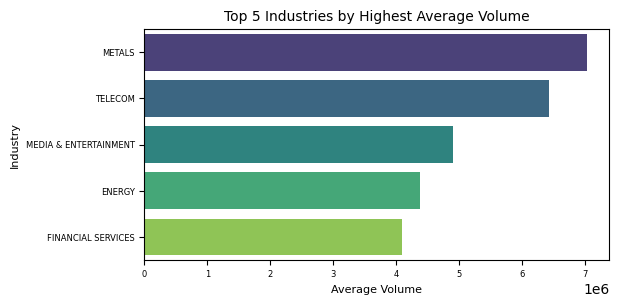

In [15]:
# plot top 5 industries by average volume

plt.figure(figsize=(6, 3))
sns.barplot(data=top_industry_volume, y='Industry', x='Volume', palette='viridis')
plt.xlabel('Average Volume', fontsize = 8)
plt.ylabel('Industry', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 Industries by Highest Average Volume', fontsize = 10)
plt.show()

**Data Interpretation:**
Metals industry has the highest average volume of stocks followed by telecom industry.

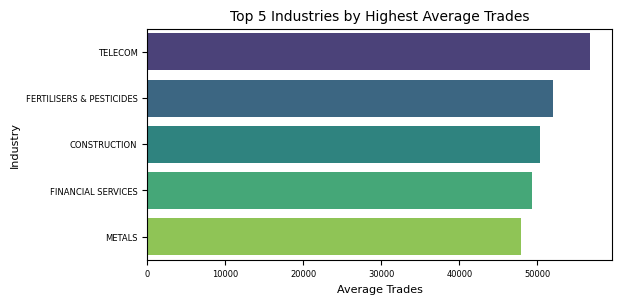

In [16]:
# plot top 5 industries by average trades

plt.figure(figsize=(6, 3))
sns.barplot(data=top_industry_trades, y = 'Industry', x = 'Trades', palette='viridis')
plt.xlabel('Average Trades', fontsize = 8)
plt.ylabel('Industry', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 Industries by Highest Average Trades', fontsize = 10)
plt.show()

**Data Interpretation:**
Telecom industry with 56,740 has the highest average trading of stocks followed by Fertilisers & Pesticides industry with 51996 average no: of trades.

In [17]:
# top 5 traders by mean volume and trades

top_traders = nifty.groupby('Symbol').agg({'Volume':'mean', 'Trades':'mean'})

# top 5 traders by mean volume
top_traders_volume = top_traders['Volume'].sort_values(ascending = False).head().reset_index()
print(f'The top 5 traders by Average Volume are: \n{top_traders_volume}')

# top 5 traders by mean trades
top_traders_trades = top_traders['Trades'].sort_values(ascending = False).head().reset_index()
print(f'The top 5 traders by Average Trades are: \n{top_traders_trades}')

The top 5 traders by Average Volume are: 
       Symbol        Volume
0        VEDL  1.564060e+07
1  TATAMOTORS  1.247240e+07
2        SBIN  1.003930e+07
3    HINDALCO  9.282843e+06
4   ICICIBANK  8.224631e+06
The top 5 traders by Average Trades are: 
       Symbol         Trades
0        INFY  112367.318144
1    AXISBANK   87271.385091
2        VEDL   79301.257085
3  TATAMOTORS   73240.906199
4        SBIN   69756.124576


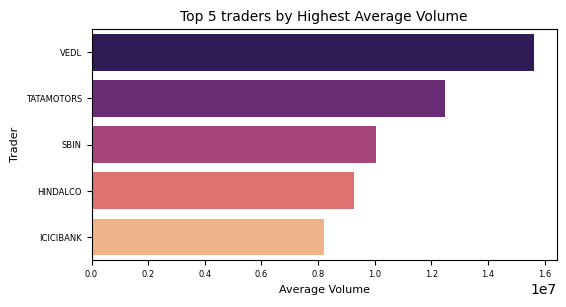

In [18]:
# plot top 5 traders by average volume

plt.figure(figsize=(6, 3))
sns.barplot(data=top_traders_volume, y='Symbol', x='Volume', palette='magma')
plt.xlabel('Average Volume', fontsize = 8)
plt.ylabel('Trader', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 traders by Highest Average Volume', fontsize = 10)
plt.show()

**Data Interpretation:**
Vedanta Stock has the highest average volume of stocks followed by Tatamotors stock.

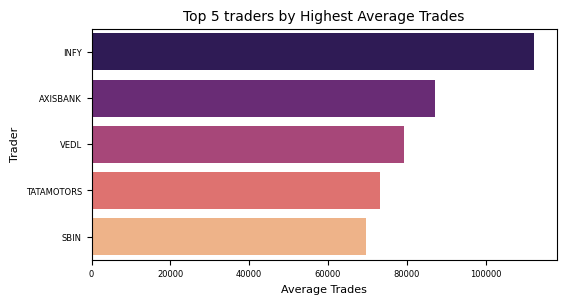

In [19]:
# plot top 5 traders by average trades

plt.figure(figsize=(6, 3))
sns.barplot(data=top_traders_trades, y='Symbol', x='Trades', palette='magma')
plt.xlabel('Average Trades', fontsize = 8)
plt.ylabel('Trader', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 traders by Highest Average Trades', fontsize = 10)
plt.show()

**Data Interpretation:**
Infosys Stock has the highest average of trades followed by Axis stock.

**2. Ranking of Most trading stock Since Inception (using Trades)**

In [20]:
# calculate the mean and sum of trades for each group of trader
trading_since_inception = nifty.groupby('Symbol').agg({'Trades':['mean', 'sum']}).sort_values(by = ('Trades', 'sum'), ascending = False).reset_index().head(5)
print(f'The top 5 most trading stocks since inception are: \n{trading_since_inception}')

The top 5 most trading stocks since inception are: 
       Symbol        Trades             
                       mean          sum
0        SBIN  69756.124576  370125997.0
1    RELIANCE  67223.229175  356686454.0
2   ICICIBANK  64046.530908  339830893.0
3  TATAMOTORS  73240.906199  315448583.0
4    AXISBANK  87271.385091  296199081.0


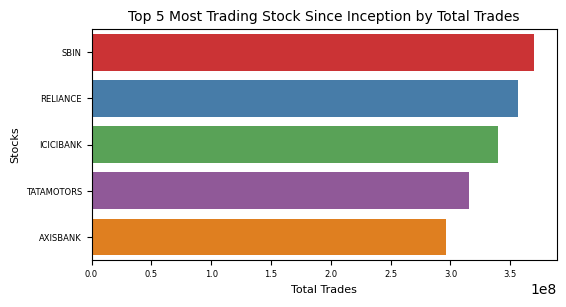

In [21]:
# plot the top 5 most trading stocks since inception

plt.figure(figsize=(6, 3))
sns.barplot(data=trading_since_inception, y='Symbol', x= ('Trades', 'sum'), palette='Set1')
plt.xlabel('Total Trades', fontsize = 8)
plt.ylabel('Stocks', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 Most Trading Stock Since Inception by Total Trades', fontsize = 10)
plt.show()

**Data Interpretation:**
SBIN is the most traded stock since it's inception with a total trades of 370125997.

**3. Top 5 best stocks using delta price % Since Inception**

In [22]:
# calculate the first and last closing price of stock grouped by company name
price_inception = nifty.groupby('Company Name').agg({'Close':['first','last']})

# Calculate the percentage change using the equation [X(final) - X(initial)] / X(initial) * 100.
price_inception['Delta Price'] = ((price_inception['Close']['last'] - price_inception['Close']['first'])/price_inception['Close']['first'])*100

# top 5 best stocks by delta price
best_stocks = price_inception.sort_values(by ='Delta Price', ascending = False).head(5).reset_index()
print(f'The top 5 best stocks by delta price are: \n{best_stocks}')

The top 5 best stocks by delta price are: 
               Company Name   Close             Delta Price
                              first      last              
0         Shree Cement Ltd.   64.75  27910.50  43005.019305
1        Eicher Motors Ltd.   48.85   2421.65   4857.318321
2  Maruti Suzuki India Ltd.  164.30   6455.65   3829.184419
3        IndusInd Bank Ltd.   28.95    934.95   3129.533679
4     UltraTech Cement Ltd.  260.20   6278.95   2313.124520


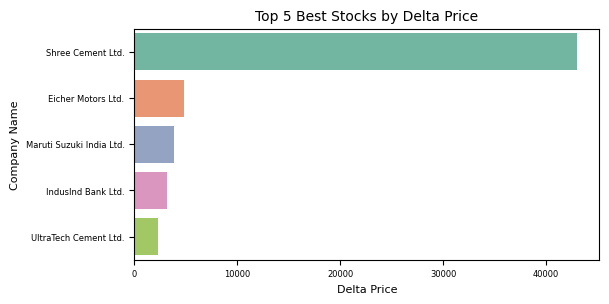

In [23]:
# plot the top 5 best stocks as per delta price %

plt.figure(figsize=(6, 3))
sns.barplot(data = best_stocks, y='Company Name', x= 'Delta Price', palette='Set2')
plt.xlabel('Delta Price', fontsize = 8)
plt.ylabel('Company Name', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 Best Stocks by Delta Price', fontsize = 10)
plt.show()

**Data Interpretation:**
Shree Cement Ltd. is the best stock with highest delta price of Rs. 43005.01 followed by Eicher Motors Ltd. with a delta price of Rs. 4857.31. 
However it is interesting to note the difference in delta price of the 1st best stock and the 2nd best stock is very huge. We can analyze further to check it's validity.

**4. Top 5 worst stocks using delta price % Since Inception**

In [24]:
# top 5 worst stocks by delta price
worst_stocks = price_inception.sort_values(by ='Delta Price').head(5).reset_index()
print(f'The top 5 worst stocks by delta price are: \n{worst_stocks}')

The top 5 worst stocks by delta price are: 
                         Company Name    Close         Delta Price
                                         first    last            
0                          Wipro Ltd.  2724.20  492.75  -81.912121
1                            ITC Ltd.   708.50  202.60  -71.404375
2         Indian Oil Corporation Ltd.   270.85   90.85  -66.457449
3  Sun Pharmaceutical Industries Ltd.  1835.05  654.45  -64.336122
4                     Coal India Ltd.   342.55  133.05  -61.158955


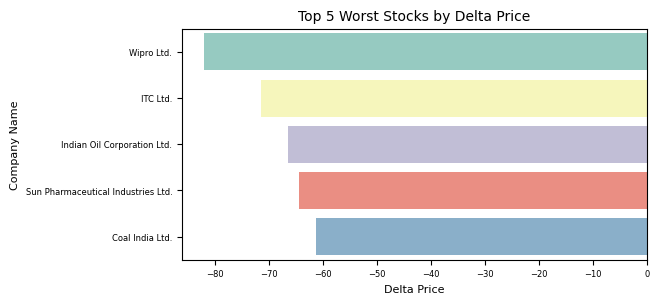

In [25]:
# plot the top 5 worst stocks as per delta price %

plt.figure(figsize=(6, 3))
sns.barplot(data = worst_stocks, y='Company Name', x= 'Delta Price', palette='Set3')
plt.xlabel('Delta Price', fontsize = 8)
plt.ylabel('Company Name', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 Worst Stocks by Delta Price', fontsize = 10)
plt.show()

**Data Interpretation:**
Wipro Ltd. is the worst stock with least delta price of Rs. -81.912121 followed by ITC Ltd. with a delta price of Rs. -71.404375. 

**5. Standard Deviation and Coefficient of Variation**

The top 5 stocks with least coeffient of variation are: 
       Symbol     Close
0  HEROMOTOCO  0.233037
1        NTPC  0.237479
2   COALINDIA  0.257488
3   POWERGRID  0.296699
4   TATASTEEL  0.322052
5         UPL  0.346828
6  BAJAJ-AUTO  0.353858
7    HINDALCO  0.355664
8          LT  0.382986
9        VEDL  0.396787


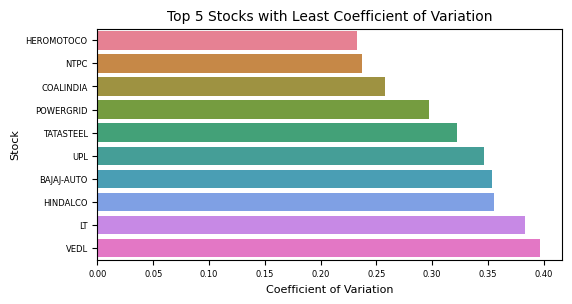

In [26]:
# calculate standard deviation for each stock
standard_deviation = nifty.groupby('Symbol')['Close'].std()

# calculate mean for each stock
mean_close_price = nifty.groupby('Symbol')['Close'].mean()

# calculate coefficient of variation  (CV=standard deviation/mean)
coeff_var = standard_deviation/mean_close_price
coeff_var_low = coeff_var.sort_values().head(10).reset_index()
print(f'The top 5 stocks with least coeffient of variation are: \n{coeff_var_low}')
# plot the top 10 stocks with least coefficient of variation

plt.figure(figsize=(6, 3))
sns.barplot(data = coeff_var_low, y='Symbol', x= 'Close', palette='husl')
plt.xlabel('Coefficient of Variation', fontsize = 8)
plt.ylabel('Stock', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 Stocks with Least Coefficient of Variation', fontsize = 10)
plt.show()

**Data Interpretation:**
A lower coefficient of variation generally indicates less variability in the stock's returns relative to its mean return. Therefore, stocks with the least coefficient of variation are considered to have more stable or predictable returns compared to those with higher coefficients of variation.

From the above graph, we can see that HEROMOTOCO has the least coefficient of variation with 0.233 followed by NTPC with cov of 0.237.

The top 5 stocks with highest coeffient of variation are: 
       Symbol     Close
0   EICHERMOT  1.437204
1    SHREECEM  1.186481
2  INDUSINDBK  1.138362
3       TITAN  1.106728
4       WIPRO  1.052599
5  BAJAJFINSV  1.041638
6      MARUTI  0.936998
7        SBIN  0.888053
8  ASIANPAINT  0.861365
9   BRITANNIA  0.808403


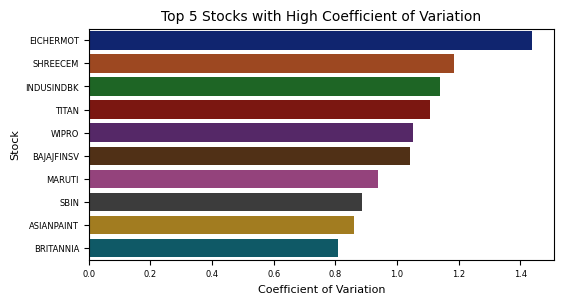

In [27]:
coeff_var_high = coeff_var.sort_values(ascending = False).head(10).reset_index()
print(f'The top 5 stocks with highest coeffient of variation are: \n{coeff_var_high}')
# plot the top 10 stocks with least coefficient of variation

plt.figure(figsize=(6, 3))
sns.barplot(data = coeff_var_high, y='Symbol', x= 'Close', palette='dark')
plt.xlabel('Coefficient of Variation', fontsize = 8)
plt.ylabel('Stock', fontsize = 8)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.title('Top 5 Stocks with High Coefficient of Variation', fontsize = 10)
plt.show()

**Data Interpretation:**
A higher coefficient of variation generally indicates high variability in the stock's returns relative to its mean return. Therefore, stocks with the high coefficient of variation are considered to have more unstable or unpredictable returns compared to those with lower coefficients of variation.

From the above graph, we can see that EICHERMOT has the highest coefficient of variation with 1.437 followed by SHREECEM with cov of 1.186.